<a href="https://colab.research.google.com/github/YounesJonas15/mp3-metadata/blob/master/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


In [ ]:
url = "https://raw.githubusercontent.com/Ya-2/Churn/main/Customer_Churn.csv"
df = pd.read_csv(url)
df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# Data description

In [ ]:
nombre_de_tuples = df.shape[0]
print("Nombre de tuples :", nombre_de_tuples)

Nombre de tuples : 3150


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [ ]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

# Etudes des données

## Analyse univariée

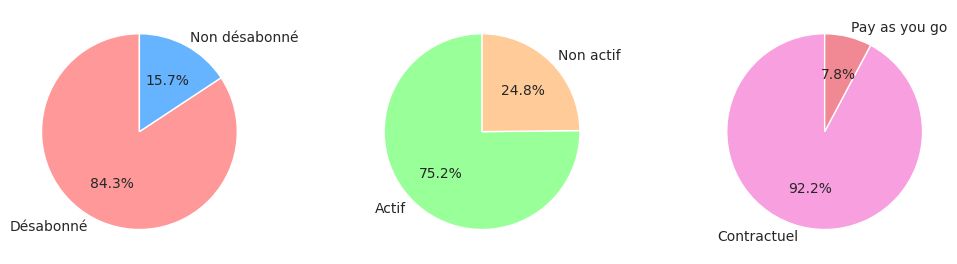

In [ ]:


# Liste des colonnes et étiquettes pour les pie charts
columns = ['Churn', 'Status','Tariff Plan']
labels_dict = {'Churn': ['Désabonné', 'Non désabonné'], 'Status': ['Actif', 'Non actif'], 'Tariff Plan' : ['Contractuel','Pay as you go']}

# Liste des couleurs pour les pie charts
colors_dict = {'Churn': ['#ff9999', '#66b3ff'], 'Status': ['#99ff99', '#ffcc99'], 'Tariff Plan': ['#F89FE0', '#F18994']}


# Calcul des pourcentages pour chaque colonne et création des pie charts
fig, axs = plt.subplots(1, len(columns), figsize=(12, 8))

for i, col in enumerate(columns):
    sizes = df[col].value_counts(normalize=True) * 100
    labels = labels_dict[col]
    colors = colors_dict[col]

    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.subplots_adjust(wspace=0.4)
plt.show()


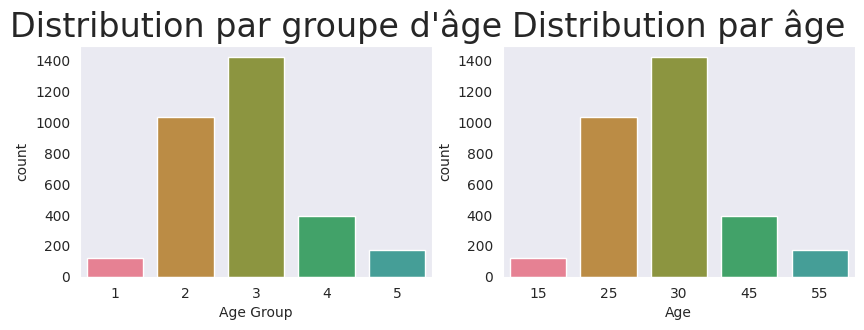

In [ ]:
sns.set_style("dark")
sns.set_palette(sns.color_palette("husl", 8))

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x="Age Group", data=df, ax=axes[0])
axes[0].set_title('Distribution par groupe d\'âge')
sns.countplot(x="Age", data=df, ax=axes[1])
axes[1].set_title('Distribution par âge')
plt.show()

similarité entre les deux variables

### Distribution des variables

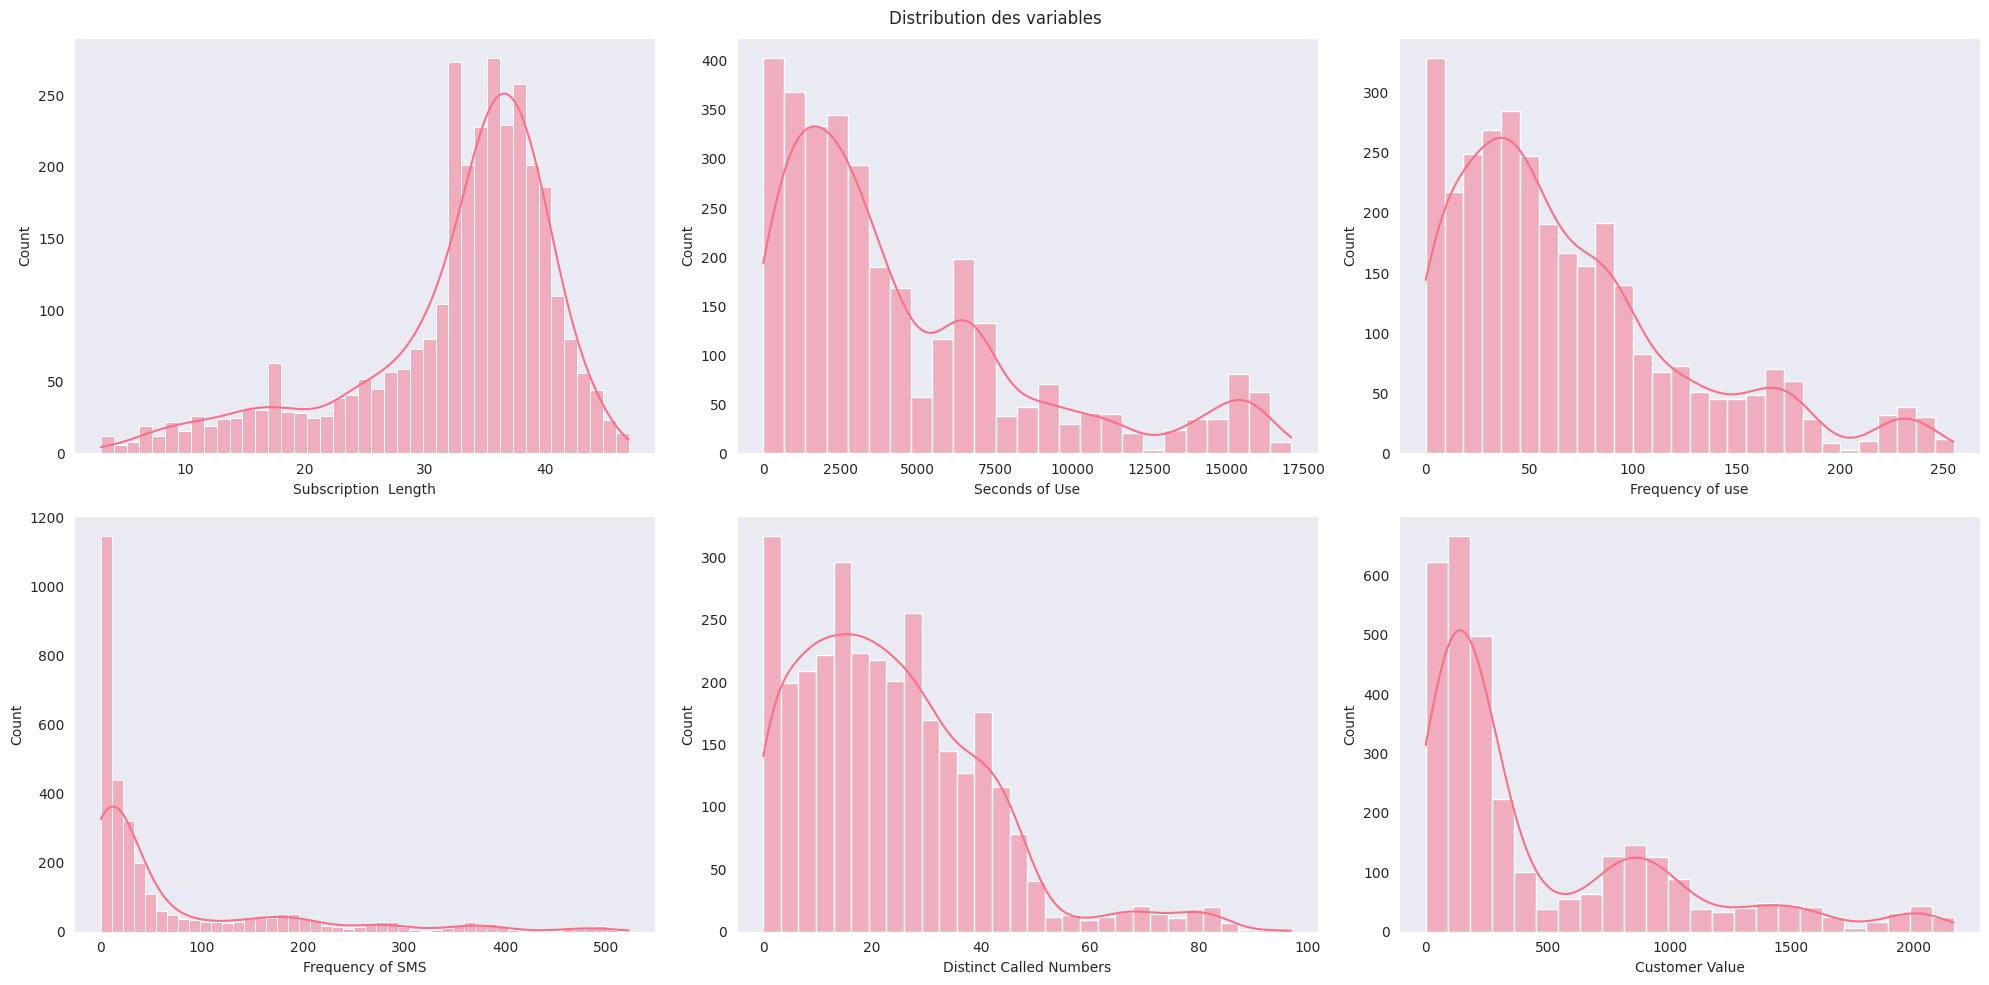

In [ ]:
cols = ['Subscription  Length', 'Seconds of Use',
        'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
        'Customer Value']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])

plt.suptitle('Distribution des variables')
plt.tight_layout()

une similarité apparente entre Frequency of Use et Seconds of Use.

## Analyse bivariée

### Matrice de corrélation

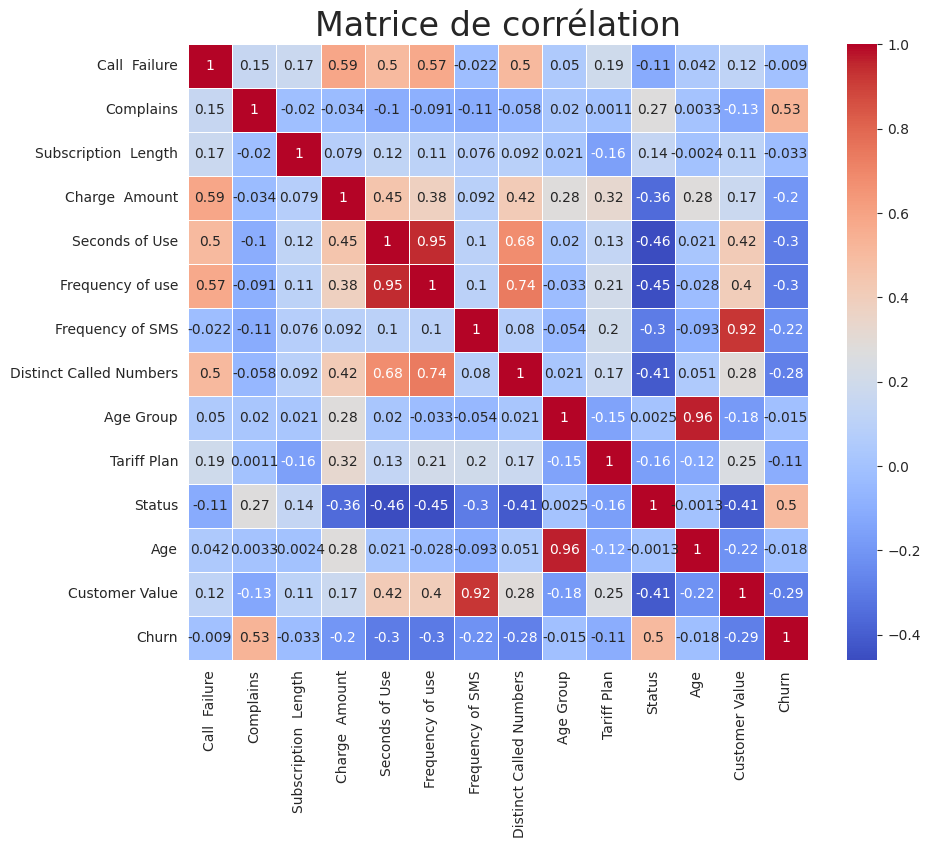

In [ ]:
corr_matrix = df.corr()

# Afficher la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

TypeError: ignored

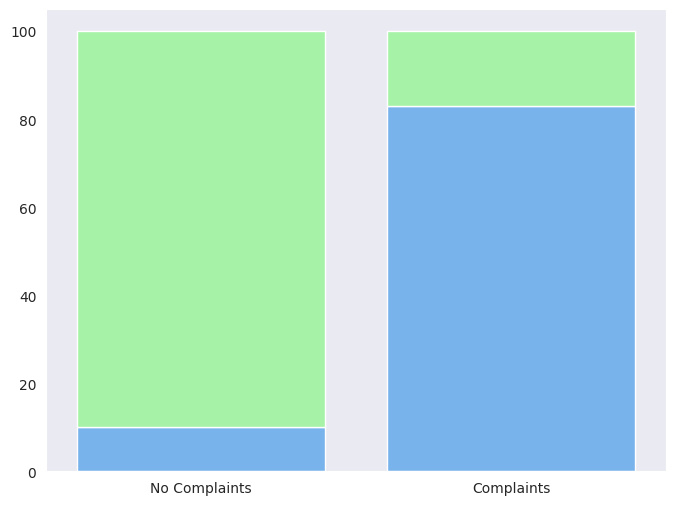

In [ ]:
c = pd.crosstab(df['Complains'], df['Churn'])
complains_churn_pourcentage = c.loc[:, 1] / c.sum(axis=1) * 100
complains_not_churn_pourcentage = c.loc[:, 0] / c.sum(axis=1) * 100

# Créer un graphique à barres en utilisant Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['No Complaints', 'Complaints'], y=complains_churn_pourcentage, color='#66b3ff', label='Churned')
sns.barplot(x=['No Complaints', 'Complaints'], y=complains_not_churn_pourcentage, color='#99ff99', bottom=complains_churn_pourcentage, label='Not Churned')

# Ajouter des étiquettes et un titre
plt.xlabel('Complains')
plt.ylabel('Percentage (%)')
plt.title('Churned Percentage Based on Complaints')
plt.legend()

###  la corrélation entre la colonne 'Churn' et les autres caractéristiques.

In [ ]:
df.drop('Churn', axis=1).corrwith(df.Churn).abs().plot(kind='barh',
                                                           figsize=(8, 6),
                                                           color='forestgreen',
                                                           title="Churn vs all Features")

### Box plot pour comparer "Seconds of Use" entre les deux groupes de "Tariff Plan"

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Tariff Plan', y='Seconds of Use', data=df)
plt.title('Box Plot - Seconds of Use par Tariff Plan')
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='Customer Value', data=df)
plt.title('Box Plot - Customer value par Churn')
plt.show()

In [ ]:
import matplotlib
plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size
cols = ['Subscription  Length', 'Call  Failure',
        'Frequency of use', 'Age', 'Distinct Called Numbers',
        'Charge  Amount']
for i, column in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    df[df["Churn"] == 0][column].hist(bins=20, color='pink', label='churn = 0(non-churn)', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=20, color='tomato', label='churn = 1(churn)', alpha=1)
    plt.legend(fontsize='medium')
    plt.title(column)

nous pouvons visualiser le nombre de désabonnement et non désabonnement en fonction de changement de certains variables qu'on estime importantes

# imporation des librairies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

#Apprentissage supérvisé

In [ ]:
counts = df['Churn'].value_counts()
print(counts)

##division des données train/test

In [ ]:
Y = df.loc[:, 'Churn'].values
X = df.drop('Churn', axis=1)
print(X.shape)
print(Y.shape)

In [ ]:
# Divise le jeu de données en (X_train, Y_train) et (X_test, Y_test) avec un ratio de 80 pour l'entrainement et 20 pour le test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

print("la taille de X_train est: ",len(X_train))
print("la taille de X_test est: ",len(X_test))
print("la taille de Y_train est: ",len(Y_train))
print("la taille de X_test est: ",len(Y_test))



In [ ]:
X_train

In [ ]:
Y_train

##Normalisation des données

> Bloc en retrait



In [ ]:
scaler= StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

sm = SMOTE(random_state=42)

print("Avant l'application de SMOTE - Classe Y_train :", Counter(Y_train))

X_train_res, Y_train_res = sm.fit_resample(X_train_normalized, Y_train)

#Afficher la distribution de classe après l'application de SMOTE
print("Après l'application de SMOTE - Classe Y_train :", Counter(Y_train_res))

In [ ]:
X_train_normalized

In [ ]:
X_test_normalized

##Algorithme KNN

In [ ]:

#param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
neigh = KNeighborsClassifier(5)
#grid_search = GridSearchCV(neigh, param_grid, cv=5)

neigh.fit(X_train_normalized, Y_train)
# Prédiction sur les données de test
#best_neigh = grid_search.best_estimator_
Y_pred = neigh.predict(X_test_normalized)
# Évaluation des performances du modèle
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

print("Accuracy score : ",accuracy_score(Y_test, Y_pred))
#print(grid_search.best_params_)
#print(grid_search.best_score_)


## Arbre de décision

In [ ]:
from sklearn import tree

param_grid = {'max_depth': [3, 5, 7, 9, 10, 15], 'criterion': ['gini', 'entropy']}
clf = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)

clf = grid_search.fit(X_train_normalized, Y_train)
Y_pred = clf.predict(X_test_normalized)
print("------------------------- Matrice de confusion -------------------")
print(confusion_matrix(Y_test, Y_pred))
print("--------------------------rapport de classification---------------")
print(classification_report(Y_test, Y_pred))
print("--------------------------meilleur paramètre----------------------")
print(grid_search.best_params_)
print("--------------------------meilleur score--------------------------")
print(grid_search.best_score_)

##Régression Logistique


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_normalized, Y_train)
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test_normalized)
# Évaluer les performances du modèle
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
# Afficher les résultats
print("------------------------- Accuracy -------------------------------")
print(accuracy)
print("------------------------- Matrice de confusion -------------------")
print(conf_matrix)
print("------------------------- Rapport de classification --------------")
print(class_report)

print(len(X))

##Regression logistique avec un gridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Initialisation des paramétres
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# Initialiser l'objet GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_normalized, Y_train)
# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)

# Évaluer les performances du modèle
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
# Afficher les résultats
print("------------------------- Accuracy -------------------")
print(accuracy)
print("------------------------- Matrice de confusion -------------------")
print(conf_matrix)
print("------------------------- Rapport de classification -------------------")
print(class_report)
print("--------------------------meilleur paramètre---------------")
print(grid_search.best_params_)
print("--------------------------meilleur score---------------")
print(grid_search.best_score_)


print(len(X))

##SVM

In [ ]:
from sklearn.svm import SVC
#Initialisation du modèle
svm_model = SVC(kernel='linear', C=1.0)
#Entrainement du modèle
start_time = time.time()
svm_model.fit(X_train_normalized, Y_train)
# Faire des prédictions sur les données de test
y_pred = svm_model.predict(X_test_normalized)

# Évaluer les performances du modèle
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
# Afficher les résultats
print("------------------------- Accuracy -------------------")
print(accuracy)
print("------------------------- Matrice de confusion -------------------")
print(conf_matrix)
print("------------------------- Rapport de classification -------------------")
print(class_report)

print(len(X))

##SVM avec un GridSearch


In [ ]:
from sklearn.svm import SVC
#Initialisation du modèle
svm_model = SVC(kernel='linear', C=1.0)
# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
# Initialiser l'objet GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train_normalized, Y_train)
# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)


# Évaluer les performances du modèle
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
# Afficher les résultats
print("------------------------- Accuracy -------------------")
print(accuracy)
print("------------------------- Matrice de confusion -------------------")
print(conf_matrix)
print("------------------------- Rapport de classification -------------------")
print(class_report)
print("--------------------------meilleur paramètre---------------")
print(grid_search.best_params_)
print("--------------------------meilleur score---------------")
print(grid_search.best_score_)
print(len(X))

##Random Forest


In [ ]:
from sklearn.cluster import KMeans

#Aprentissage non supervisé

## Algorithms Kmeans

###le nombre optimal de clusters

####Elbow method

In [ ]:
df

In [ ]:
columns_to_drop = ['Age Group', 'Status', 'Tariff Plan', 'Age', 'Churn', 'Complains', 'Call  Failure']
cluster_data = df.drop(columns=columns_to_drop)
cluster_data






In [ ]:
def optimise_kmeans(data, k_max):
    means = []
    inertias = []
    for k in range(1, k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Nombre de clusters')
    ax.set_ylabel('Inertie')
    ax.grid(True)
    plt.show()



In [ ]:
cluster_data

In [ ]:
optimise_kmeans(cluster_data, 10)


Remarque : la Distance est beaucoup réduite quand on applique 3 cluster.

###Application de l'algo K-means


In [ ]:
kmeans= KMeans(n_clusters = 3)
kmeans.fit(df)


In [ ]:
df['kmeans_3']= kmeans.labels_


In [ ]:

df


In [ ]:
counts = df['kmeans_3'].value_counts()
print(counts)

###affichage du resultat k-means

In [ ]:
plt.scatter(x=df['Frequency of use'], y= df['Subscription  Length'], c=df['kmeans_3'])
plt.xlabel = "Frequency of us"
plt.show()

## PCA